In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
digits = fetch_openml('mnist_784')
images = digits.data.reshape(-1, 28, 28)
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)

Слева оригинал, справа - изображение, восстановленное из проекции

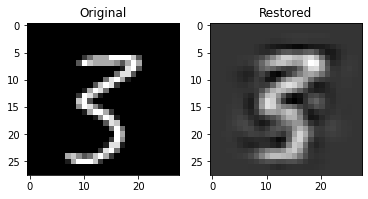

In [2]:
%matplotlib inline
i = 540
fig, ax = plt.subplots(1, 2)
ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(X_restored[i].reshape(28, 28), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()

### Задача 1
Выпишите явное линейное преобразование, которое отображает точку из подространства главных компонент в исходное пространство (заполните ??? так, чтобы результат совпал с результатом в предыдущей ячейке)

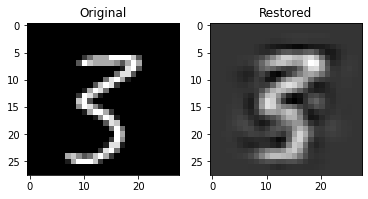

In [3]:
res = np.dot(X_transformed, pca.components_) + pca.mean_

i = 540
fig, ax = plt.subplots(1, 2)
ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(res[i].reshape(28, 28), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()

### Задача 2

Определите, сколько нужно взять главных компонент, чтобы объяснить  99%, 95%, 90%, и 85% исходной дисперсии.

In [4]:
def findn(nleft,nright,k):
    if(nright-nleft==1):
        return nright
    n=(nleft+nright)//2
    pcafull=PCA(n_components=n)
    pcafull.fit(digits.data.astype(float))
    if(pcafull.explained_variance_ratio_.sum()<k):
        return findn(n,nright,k)
    else:
        return findn(nleft,n,k)

In [5]:
findn(300,350,0.99)

333

In [6]:
findn(150,200,0.95)

155

In [7]:
findn(75,100,0.90)

87

In [8]:
findn(50,75,0.85)

59

### Задача 3

Нарисуйте пример исходного изображения и результат восстановления из числа компонент, которое вы нашли в предыдущей задаче.

![img](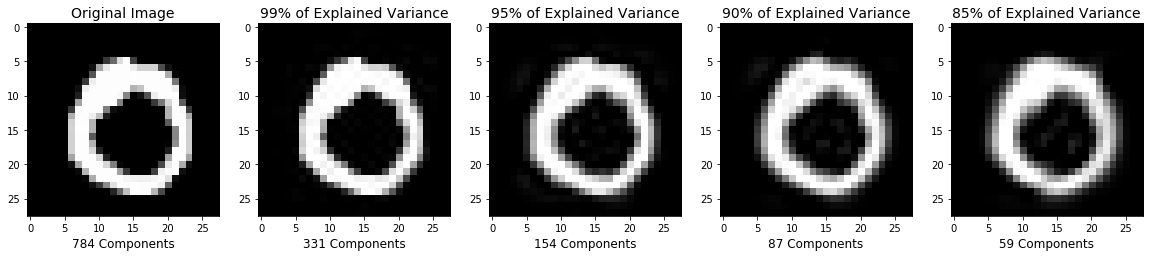%0A)

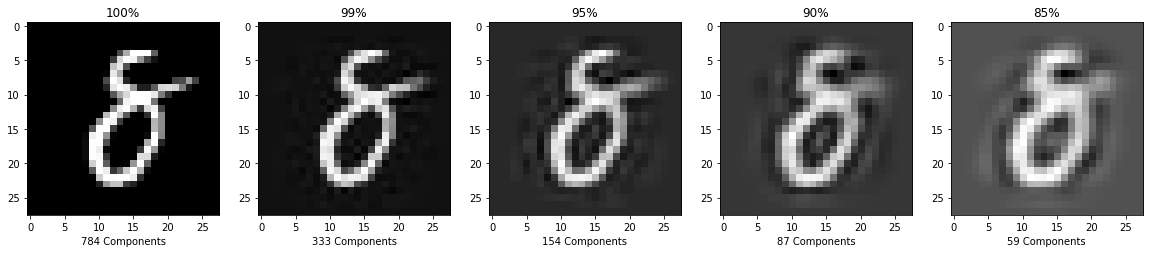

In [9]:
i = np.random.randint(1,70000)
fig, ax = plt.subplots(1, 5,figsize=(20,20))
ax[0].imshow(images[i], cmap='gray')
pca=PCA(n_components=333)
ax[1].imshow(pca.inverse_transform(pca.fit_transform(digits.data.astype(float)))[i].reshape(28, 28), cmap='gray')
pca=PCA(n_components=154)
ax[2].imshow(pca.inverse_transform(pca.fit_transform(digits.data.astype(float)))[i].reshape(28, 28), cmap='gray')
pca=PCA(n_components=87)
ax[3].imshow(pca.inverse_transform(pca.fit_transform(digits.data.astype(float)))[i].reshape(28, 28), cmap='gray')
pca=PCA(n_components=59)
ax[4].imshow(pca.inverse_transform(pca.fit_transform(digits.data.astype(float)))[i].reshape(28, 28), cmap='gray')
ax[0].set_title('100%')
ax[0].set_xlabel('784 Components')
ax[1].set_title('99%')
ax[1].set_xlabel('333 Components')
ax[2].set_title('95%')
ax[2].set_xlabel('154 Components')
ax[3].set_title('90%')
ax[3].set_xlabel('87 Components')
ax[4].set_title('85%')
ax[4].set_xlabel('59 Components')
plt.show()

### Задача 4

Предложите способ генерации новых изображений с числами и приведите примеры сгенерированных картинок.

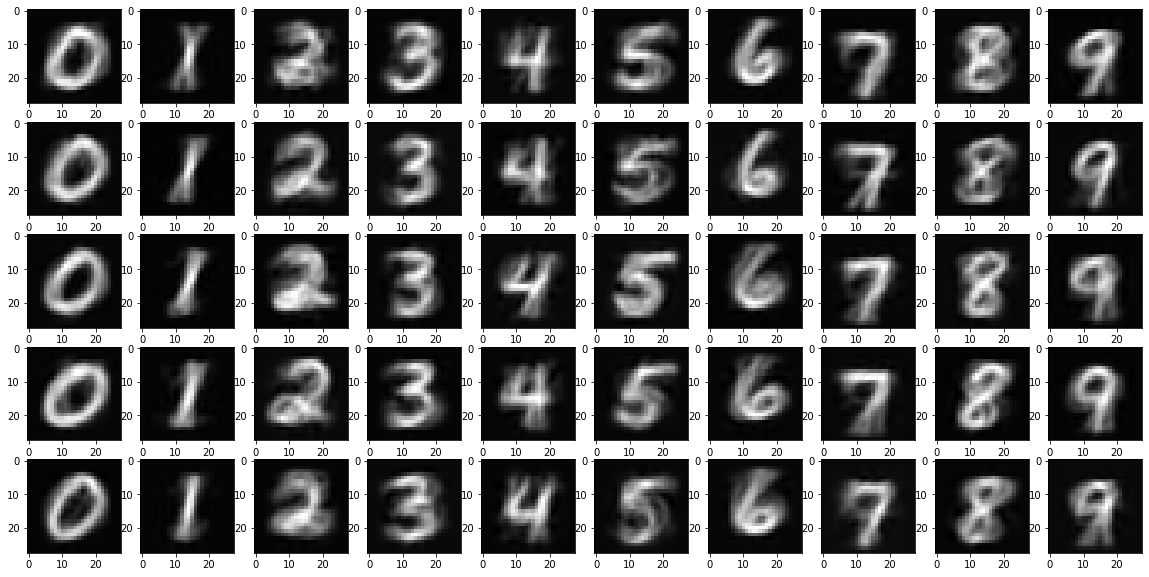

In [10]:
fig, ax = plt.subplots(5, 10,figsize=(20,10))
pca = PCA(n_components=154)
X_transformed = pca.fit_transform(digits.data.astype(float))
for j in range(5):
    for i in range(10):
        d=X_transformed[digits.target==str(i)]
        v=d[np.random.choice(np.arange(len(d)),20,replace=False)]
        r=np.random.rand(v.shape[0])
        r=r/r.sum()
        pic=v.T.dot(r)
        pic=pca.inverse_transform(pic)
        ax[j,i].imshow(pic.reshape(28,28),cmap='gray')
plt.show()